<a href="https://colab.research.google.com/github/BKN1810/Machine-Learning/blob/master/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("/content/sample_data/pima-indians-diabetes.csv", header=None, names=col_names)
pima.head()  

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable


In [4]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1) 

In [5]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=3,min_samples_leaf=2)

# Train Decision Tree Classifer
model = model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7760416666666666
[[111  12]
 [ 31  38]]
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       123
           1       0.76      0.55      0.64        69

    accuracy                           0.78       192
   macro avg       0.77      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192



In [7]:
# You can also make a prediction for a single item, for e=xample:
# pregnant=6, insulin=0, 'bmi=33.6, age=50,glucose=148,bp=72, pedigree=0.627
model.predict([[6, 0, 33.6,50, 148,72,0.627 ]])

array([1])

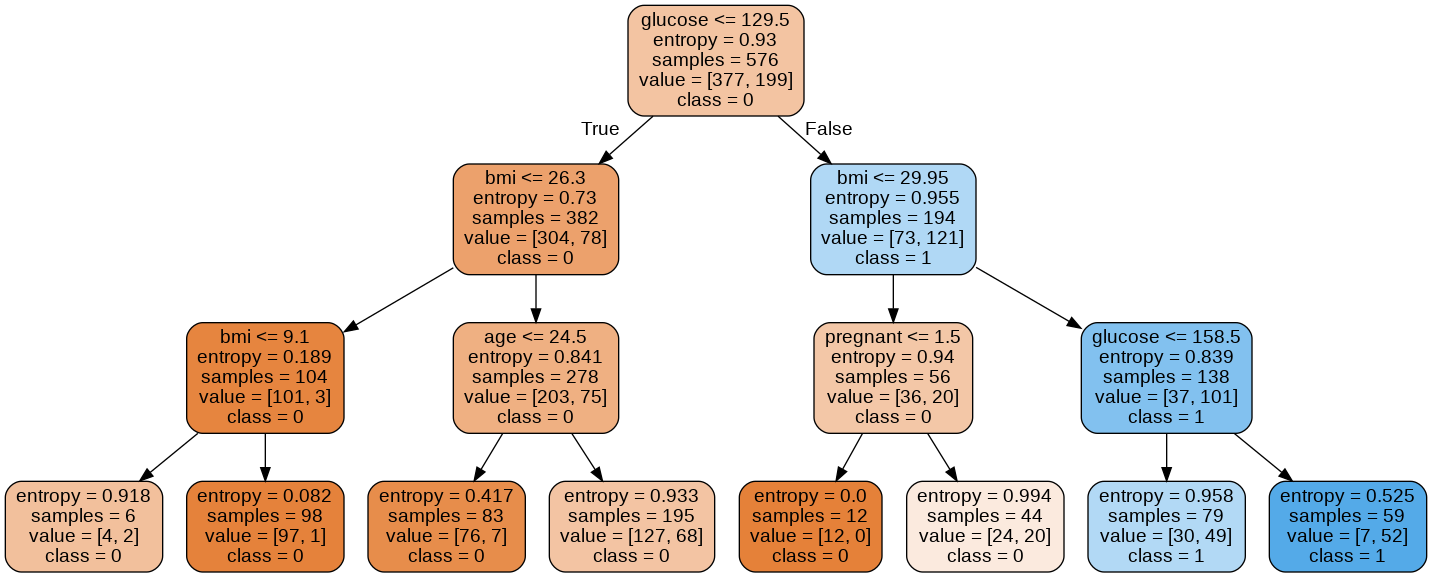

In [11]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                 feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('D:\Dataset\diabetes.png')
Image(graph.create_png())